In [6]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import random

## Preprocessing ##

In [7]:
raw_data_df = pd.read_csv('globalterrorismdb_0617dist.csv')

# data cleaning
lat_lng_data = pd.DataFrame(raw_data_df, columns=['latitude', 'longitude'])
clean_data = lat_lng_data.dropna(axis=0, how='any')

# save to CSV
has_header = True # False when uploading to cluster
clean_data.to_csv('clean_data.csv', columns = ["latitude", "longitude"], index=False, header=has_header)

In [8]:
clean_data_df = pd.read_csv('clean_data.csv')
clean_lats = clean_data_df['latitude']
clean_lons = clean_data_df['longitude']
lats = clean_lats.tolist()
lons = clean_lons.tolist()

Now, set centroids

In [9]:
# k different centroids
k = 5

# colors = ['y', 'y', 'y', 'y', 'y', 'y', 'k']
centroid_1 = (2.361956292733226, 29.36602923946585)
centroid_2 = (9.207740262716625, 115.80481474889932)
centroid_3 = (28.406414022007812, 74.12808393025578)
centroid_4 = (3.2801139683765075, -79.74785539671865)
centroid_5 = (38.414250505940146, 28.417748608803993)
centroids = [centroid_1, centroid_2, centroid_3, centroid_4, centroid_5]

## Create the map

In [ ]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20,resolution='c')
# map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

### Post-processing ###

In [ ]:
### get clusters
cluster_file = open('clusters.txt','r')
lines = cluster_file.readlines()
clusters = dict()
for i in range(k):
    clusters[i] = []

colors = ['b', 'k', 'r', 'm', 'y', 'g', 'c']
for line in lines:
    entries = line.split(', ')
    entries = [entry.strip('()') for entry in entries]
    entries = [entry.replace("))\n", "") for entry in entries]
    index, lat, lng = entries
    clusters[int(index)].append((lat, lng))

centroid_colors = zip(centroids, colors)

## Plotting ##

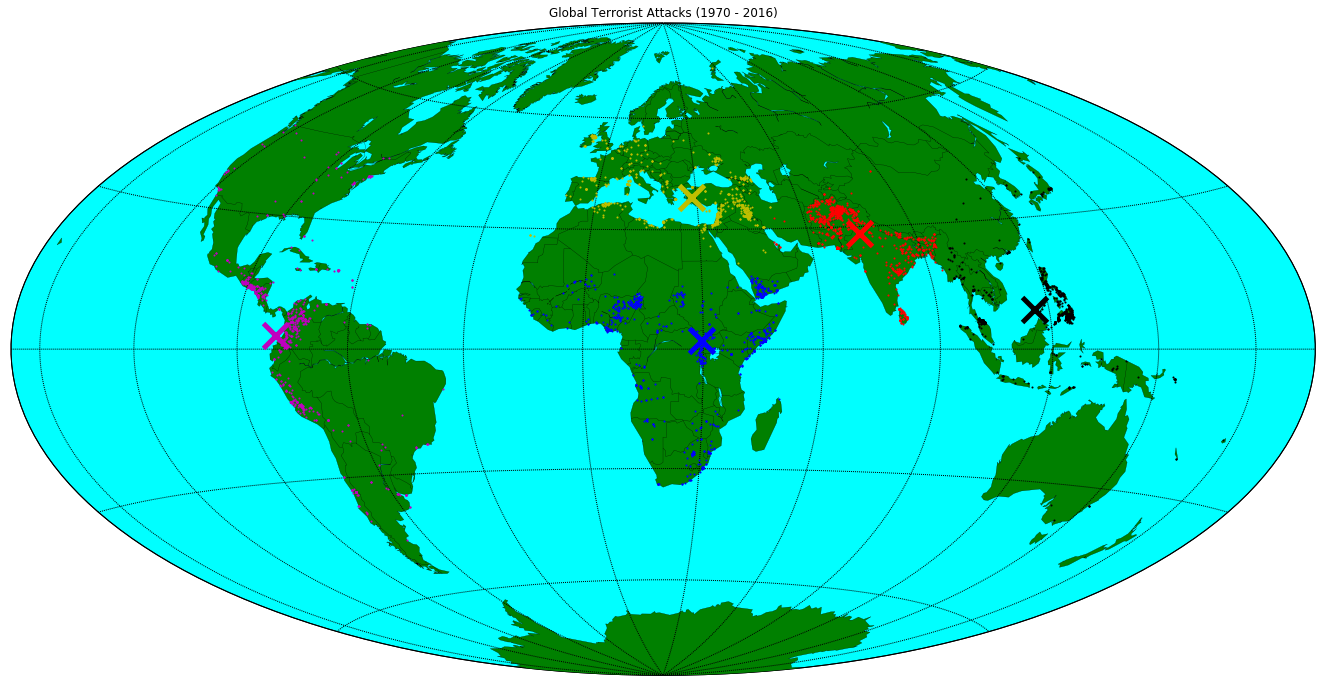

In [20]:
# plot clusters
for centroid_idx in range(k):
    cluster = clusters[centroid_idx]
    num_samples = 1000
    random_samples = random.sample(cluster, num_samples)
    for (lat, lon) in random_samples:
        x, y = map(lon, lat)
        color = colors[centroid_idx]
        marker_style = color + 'o'
        map.plot(x, y, marker_style, markersize=1.05)

# plot centroids
for (lat, lon), color in centroid_colors:
    x,y = map(lon, lat)
    marker_style = color + 'x'
    map.plot(x, y, marker_style, markersize=25, mew=5)

title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()

## Create map of all terrorist attacks

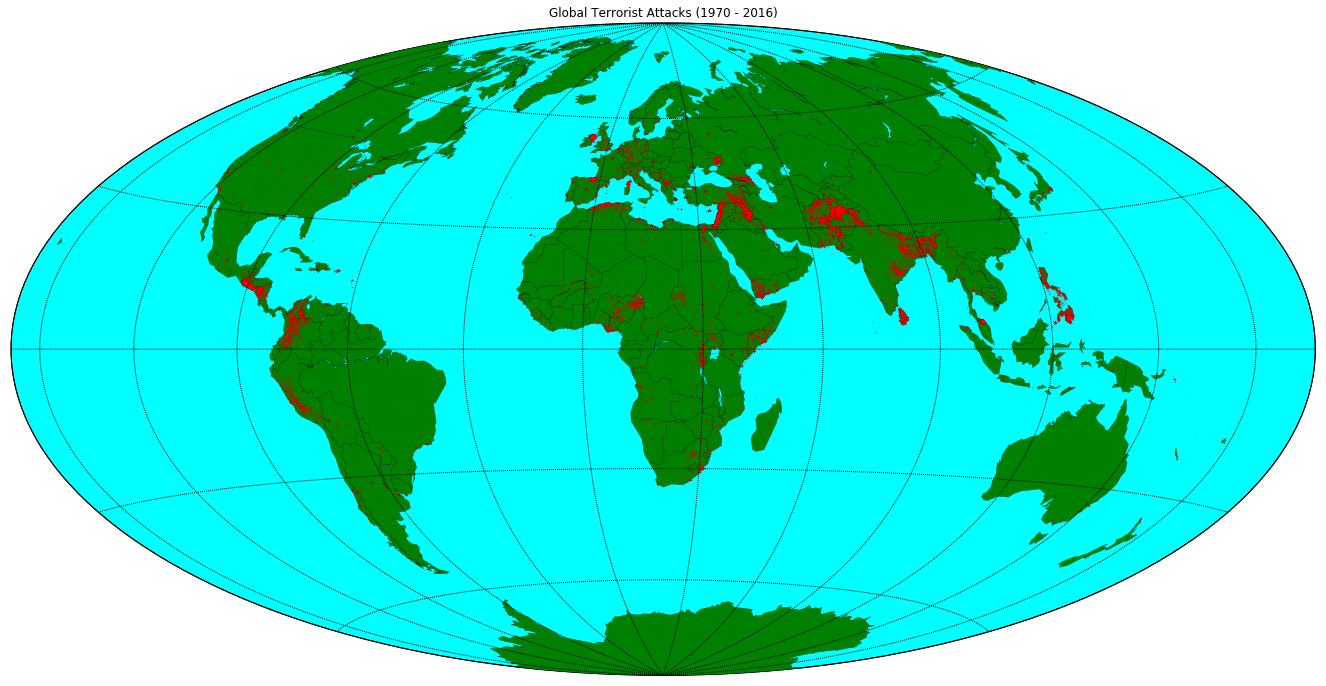

In [22]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20)
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=.05)

title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()

## Create Map of only centroids

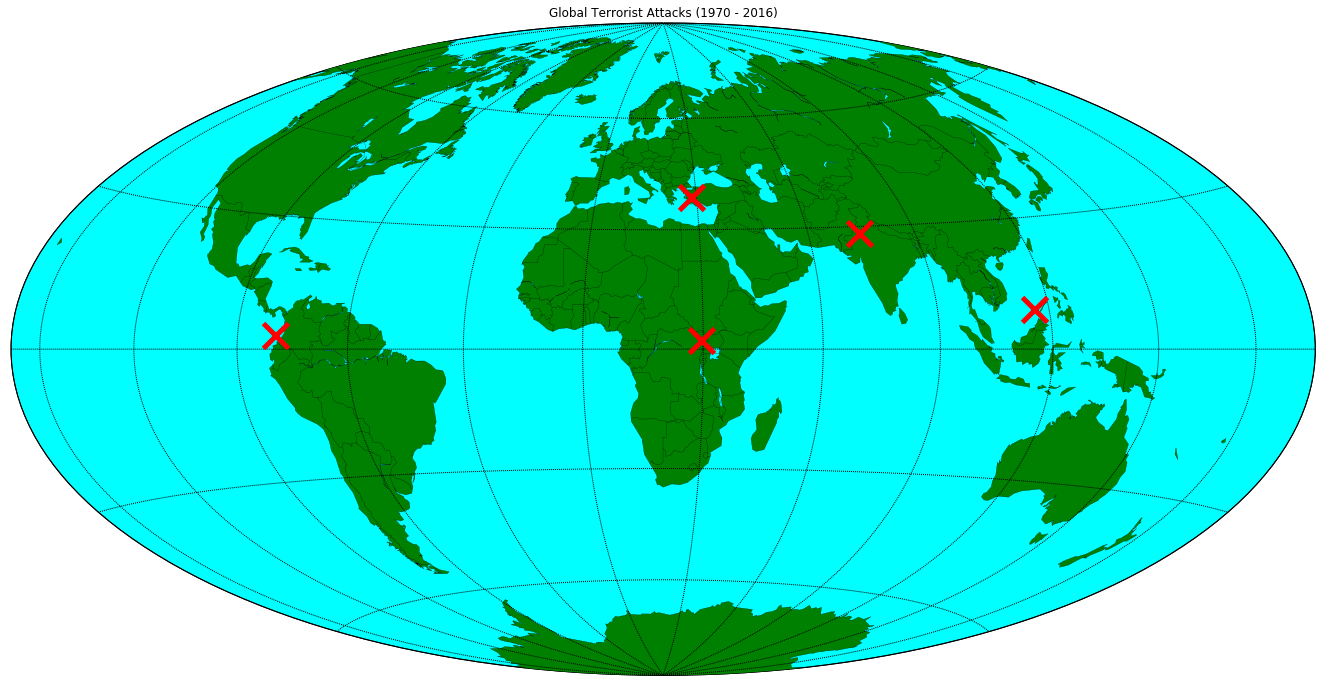

In [23]:
plt.figure(figsize=(24,12))
map = Basemap(projection='hammer',lon_0=20)
# map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# plot centroids
for (lat, lon), color in centroid_colors:
    x,y = map(lon, lat)
    marker_style = 'rx'
    map.plot(x, y, marker_style, markersize=25, mew=5)
title_string = "Global Terrorist Attacks (1970 - 2016)"
plt.title(title_string)

plt.show()